In [72]:
#Create data frames

import pandas as pd

#Top 10000 File
top_10000_file='./data/top_10000_1960-now.csv'

albums=pd.read_csv(top_10000_file,header=0)

albums.head(2)

#Events File
world_events_file='./data/copy_Events.csv'

events=pd.read_csv(world_events_file,header=0)

# Show first two rows of events file
events.head(2)


,Year,Event Description
0,2004,9/11 Commission
1,2001,Anthrax Attacks U.S.


In [69]:
############# Profiling and Transformation section ############################

#***************************** 'Albums' transformation ***************************************

#change 'album release date' column to release_date
albums=albums.rename(columns={'Album Release Date':'release_date'})

#Show first row of albums file
albums.head(1)

#show dates in ascending order 
albums.sort_values(['release_date'],ascending=True)

#show blank rows
albums.loc[albums.release_date.isna()]

#drop blank rows
albums.dropna(subset=['release_date'],inplace=True)

#show datatypes in 'albums'
print(albums.dtypes)

#change 'release_date' object to a datetime object
# 'errors=coerce' will change any bad date values to 'NaT' which means 'Not a Time'
albums['release_date']=pd.to_datetime(albums['release_date'],format='%Y-%m-%d',errors='coerce')

# Add 'album_year' column to top 10000 file
albums['album_year']=albums['release_date'].dt.year

#Show updated dataframe with new column
albums.sort_values(['release_date'],ascending=True)

#*************************************** 'Events' transformation *****************************
#show datatypes in 'events'
print(events.dtypes)


Year                  int64
Event Description    object
dtype: object


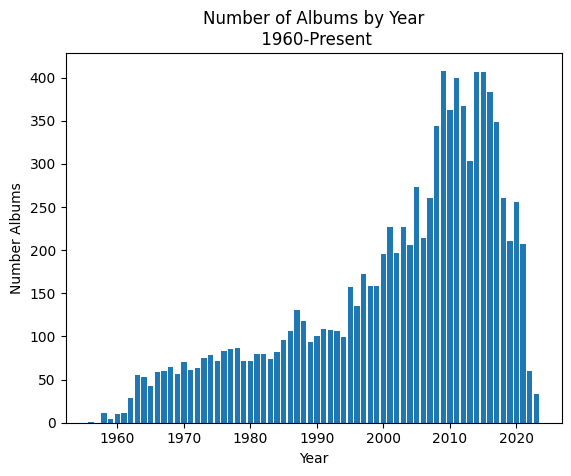

Artist Name(s)            album_year
"Weird Al" Yankovic       2009          1
*NSYNC                    1997          2
                          2000          3
                          2001          1
                          2005          1
                                       ..
will.i.am, Cody Wise      2014          2
will.i.am, Eva Simons     2013          1
will.i.am, Justin Bieber  2013          2
will.i.am, Miley Cyrus    2013          1
will.i.am, Nicki Minaj    2010          1
Name: album_year, Length: 6791, dtype: int64

In [74]:
################## Create Visuals ################

#********** Number of Albums by Year #########
import matplotlib.pyplot as plt

#Create a variable to hold a count of unique album years(value_counts), then sort in ascending order (sort_index)
album_count=albums['album_year'].value_counts().sort_index()

#Create the bar chart with 'album_count.index' for the x axis and album_count.values for the Y axis
plt.bar(album_count.index,album_count.values)

# Add a title to the chart
plt.title("Number of Albums by Year\n 1960-Present")

#Label the X and Y axis
plt.xlabel('Year')
plt.ylabel('Number Albums')

#Show the chart
plt.show()

#Show number of albums by artist and year
albums_per_artist= albums.groupby(['Artist Name(s)','album_year']).album_year.count()
albums_per_artist


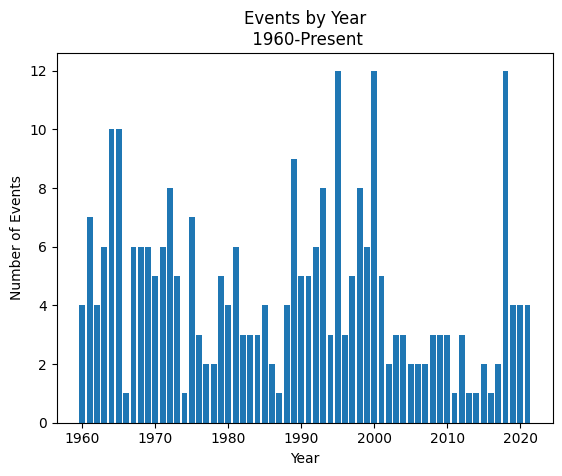

Event Description                                                                   Year
 9/11 Commission                                                                    2004    1
 AOL Purchases Time Warner                                                          2000    1
 Anthrax Attacks U.S.                                                               2001    1
 Barak Obama Inaugurated President                                                  2009    1
 Barak Obama to be Democratic Candidate                                             2008    1
                                                                                           ..
Watergate scandal becomes public                                                    1973    1
Watts Riots in Los Angeles                                                          1965    1
William Jefferson "Bill" Clinton inaugurated as forty-second President of the U.S.  1993    1
Woodstock music festival in upstate New York                     

In [75]:
#**************************** Number of events by Year ****************************

import matplotlib.pyplot as plt

#Create a variable to hold a count of unique Event years(value_counts), then sort in ascending order (sort_index)
event_count=events['Year'].value_counts().sort_index()

#Create the bar chart with 'event_count.index' for the x axis and event_count.values for the Y axis
plt.bar(event_count.index,event_count.values)

# Add a title to the chart
plt.title("Events by Year\n 1960-Present")

#Label the X and Y axis
plt.xlabel('Year')
plt.ylabel('Number of Events')

#Show the chart
plt.show()

#Show number of events by Description and year
event_details= events.groupby(['Event Description','Year']).Year.count()

event_details